In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('finallaptop.csv')



In [3]:
# Define features and target variable
X = df.drop('normalized_price', axis=1) # all columns except 'normalized_price'
y = df['normalized_price'] # target variable


In [15]:
X.describe()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,cpu_speed,cpum,gpum
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,6.446237,2.584485,15.016743,8.376344,15.023810,4.713518,0.491551,2.037025,13.907834,0.953149,2.029186
std,4.083839,1.243648,1.426761,5.082229,8.232883,0.895862,1.084942,0.663464,5.109932,0.215006,0.927375
min,0.000000,0.000000,10.100000,2.000000,0.000000,0.000000,0.000000,0.690000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,14.000000,4.000000,8.000000,5.000000,0.000000,1.500000,11.000000,1.000000,2.000000
50%,7.000000,3.000000,15.600000,8.000000,15.000000,5.000000,0.000000,2.040000,16.000000,1.000000,2.000000
75%,10.000000,3.000000,15.600000,8.000000,22.000000,5.000000,0.000000,2.300000,18.000000,1.000000,3.000000
max,18.000000,5.000000,18.400000,64.000000,37.000000,6.000000,4.000000,4.700000,24.000000,2.000000,3.000000


In [4]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# Feature scaling (optional but recommended for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:

# Initialize the model (you can choose different models based on your problem)
model = LinearRegression()

# Train the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

#

0.6336904572616091

In [16]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [17]:


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}


In [18]:

# Linear Regression
lr_params = {}
lr_grid = GridSearchCV(LinearRegression(), lr_params, cv=5, scoring='neg_mean_squared_error')
lr_grid.fit(X_train_scaled, y_train)
lr_best = lr_grid.best_estimator_
lr_pred = lr_best.predict(X_test_scaled)
results['Linear Regression'] = (mean_squared_error(y_test, lr_pred), r2_score(y_test, lr_pred))


In [19]:

# Ridge Regression
ridge_params = {'alpha': [0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(X_test_scaled)
results['Ridge Regression'] = (mean_squared_error(y_test, ridge_pred), r2_score(y_test, ridge_pred))

# Lasso Regression
lasso_params = {'alpha': [0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test_scaled)
results['Lasso Regression'] = (mean_squared_error(y_test, lasso_pred), r2_score(y_test, lasso_pred))


In [20]:

# ElasticNet Regression
elasticnet_params = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
elasticnet_grid = GridSearchCV(ElasticNet(), elasticnet_params, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train_scaled, y_train)
elasticnet_best = elasticnet_grid.best_estimator_
elasticnet_pred = elasticnet_best.predict(X_test_scaled)
results['ElasticNet Regression'] = (mean_squared_error(y_test, elasticnet_pred), r2_score(y_test, elasticnet_pred))


In [21]:

# Decision Tree Regression
dt_params = {'max_depth': [None, 5, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train_scaled, y_train)
dt_best = dt_grid.best_estimator_
dt_pred = dt_best.predict(X_test_scaled)
results['Decision Tree Regression'] = (mean_squared_error(y_test, dt_pred), r2_score(y_test, dt_pred))

# Random Forest Regression
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test_scaled)
results['Random Forest Regression'] = (mean_squared_error(y_test, rf_pred), r2_score(y_test, rf_pred))


In [22]:

# Gradient Boosting Regression
gb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5, scoring='neg_mean_squared_error')
gb_grid.fit(X_train_scaled, y_train)
gb_best = gb_grid.best_estimator_
gb_pred = gb_best.predict(X_test_scaled)
results['Gradient Boosting Regression'] = (mean_squared_error(y_test, gb_pred), r2_score(y_test, gb_pred))



In [23]:
# Support Vector Regression
svr_params = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.5, 1]}
svr_grid = GridSearchCV(SVR(kernel='rbf'), svr_params, cv=5, scoring='neg_mean_squared_error')
svr_grid.fit(X_train_scaled, y_train)
svr_best = svr_grid.best_estimator_
svr_pred = svr_best.predict(X_test_scaled)
results['SVR'] = (mean_squared_error(y_test, svr_pred), r2_score(y_test, svr_pred))


In [24]:

# K-Nearest Neighbors Regression
knn_params = {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train_scaled, y_train)
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test_scaled)
results['KNN Regression'] = (mean_squared_error(y_test, knn_pred), r2_score(y_test, knn_pred))


In [25]:

# Printing results
for model, (mse, r2) in results.items():
    print(f"{model}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")
    print()


Linear Regression:
  Mean Squared Error: 0.004056896746793239
  R-squared: 0.6336904572616088

Ridge Regression:
  Mean Squared Error: 0.004056746130174706
  R-squared: 0.6337040568940636

Lasso Regression:
  Mean Squared Error: 0.011133720538440925
  R-squared: -0.005297480799105525

ElasticNet Regression:
  Mean Squared Error: 0.00482614357452933
  R-squared: 0.5642328222001054

Decision Tree Regression:
  Mean Squared Error: 0.0037127243597448257
  R-squared: 0.664766828584724

Random Forest Regression:
  Mean Squared Error: 0.002004656675330146
  R-squared: 0.8189934533906751

Gradient Boosting Regression:
  Mean Squared Error: 0.0019937111167516114
  R-squared: 0.8199817611559856

SVR:
  Mean Squared Error: 0.004558418514643252
  R-squared: 0.5884065319066678

KNN Regression:
  Mean Squared Error: 0.002602354334380032
  R-squared: 0.7650255143852189



In [35]:
print("X_test shape:", X_test.squeeze().shape)
print("pred shape", pred.shape)

X_test shape: (261, 11)
pred shape (261,)


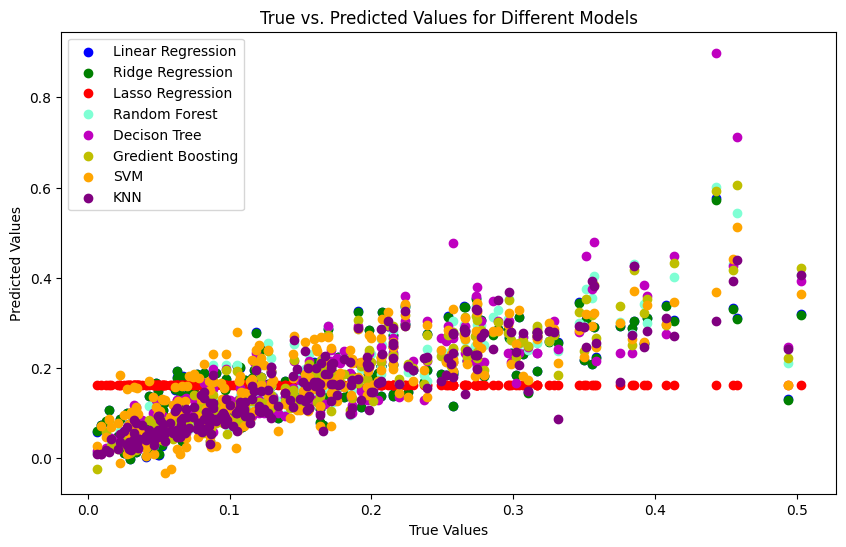

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,lr_pred, color='blue', label='Linear Regression')
plt.scatter(y_test,ridge_pred, color='green', label='Ridge Regression')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso Regression')
plt.scatter(y_test, rf_pred, color='aquamarine', label='Random Forest')
plt.scatter(y_test,dt_pred , color='m', label='Decison Tree')
plt.scatter(y_test,gb_pred , color='y', label='Gredient Boosting')
plt.scatter(y_test,svr_pred , color='orange', label='SVM')
plt.scatter(y_test,knn_pred , color='purple', label='KNN')


plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for Different Models')
plt.legend()
plt.show()


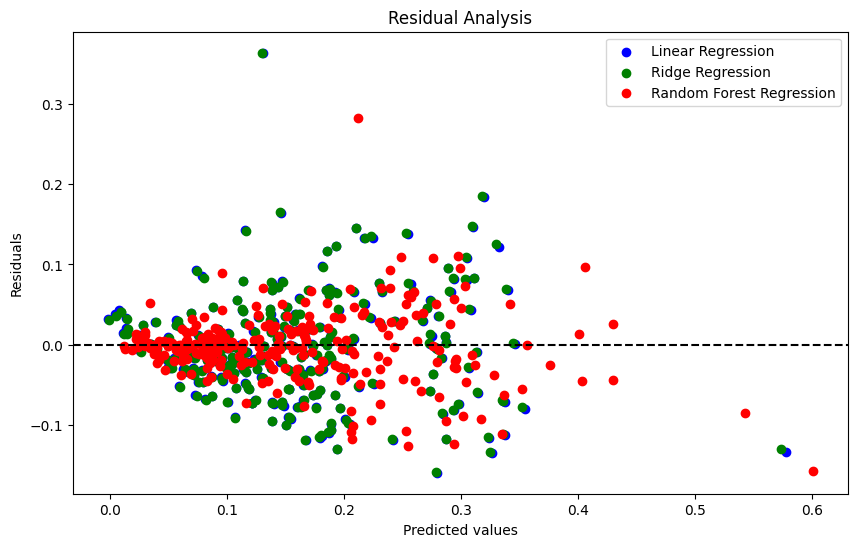

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(lr_pred, y_test - lr_pred, color='blue', label='Linear Regression')
plt.scatter(ridge_pred,y_test-ridge_pred, color='green', label='Ridge Regression')
plt.scatter(rf_pred, y_test - rf_pred, color='red', label='Random Forest Regression')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()